## Installing Libraries

In [3]:
%pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
%%bash 
python --version

Python 3.13.0


In [16]:
%pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 4.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 3.4 MB/s eta 0:00:003.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 2.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.8 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import cv2

import matplotlib.pyplot as plt 
from sklearn.utils import shuffle

## Load Data

In [2]:
df = pd.read_csv('./data/labels_train.csv')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
68922,1479499367031396362.jpg,227,234,139,147,1
10993,1478021017221073370.jpg,336,347,135,158,3
58403,1478898513123213987.jpg,66,103,153,168,1
104282,1479503819333336336.jpg,133,140,137,144,1
118585,1479505027914735258.jpg,168,183,141,155,1


The Datset is labelled with five classes: 'car', 'truck', 'pedestrian', 'bicyclist', 'light'

In [3]:
classes = df.class_id.unique()
classes

array([1, 3, 5, 2, 4])

In [4]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

## Visualize Images

In [5]:
boxes = {}
images = {}

base_path = './data/images/'

for id in classes: 
    first_row = df[df['class_id'] == id].iloc[0]

    images[id] = cv2.imread(base_path + first_row['frame'])
    boxes[id] = [first_row['xmin'], first_row['xmax'], first_row['ymin'], first_row['ymax']]

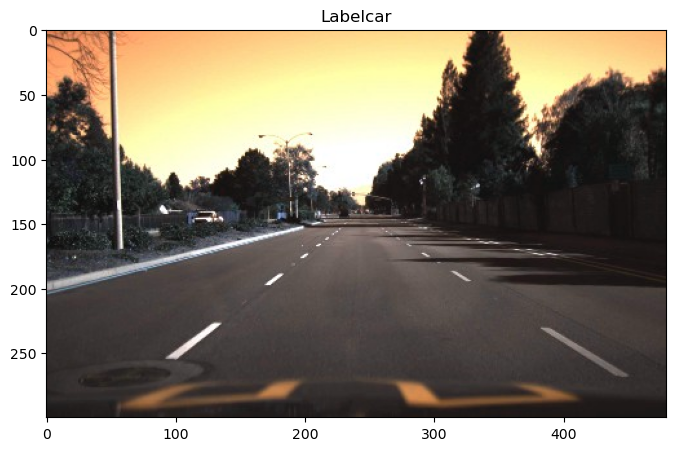

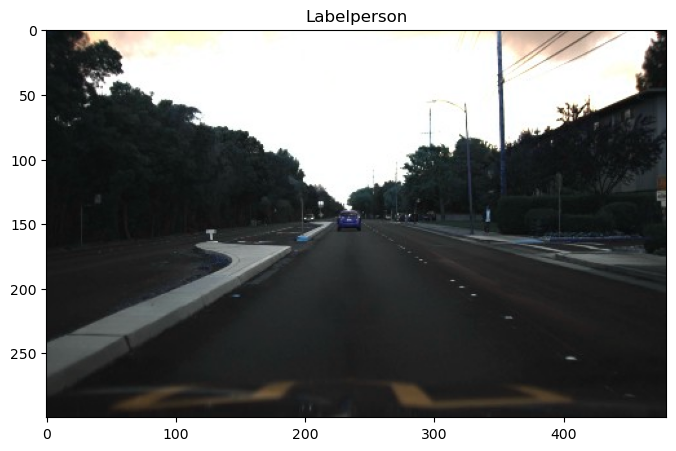

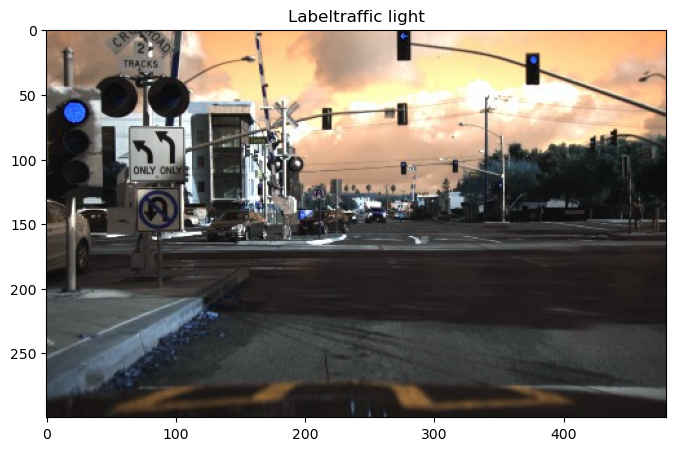

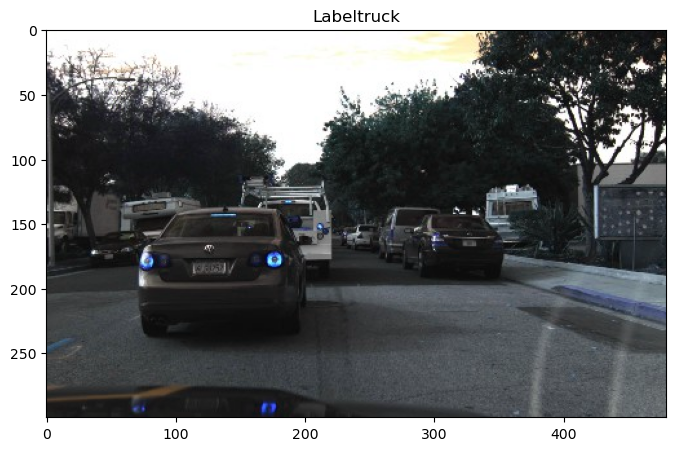

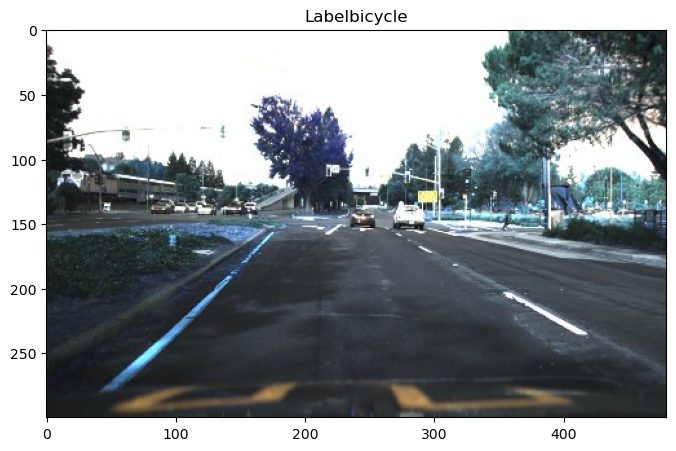

In [6]:
for i in classes: 
    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8,10))
    plt.title('Label'+ labels[i])
    plt.imshow(images[i])
    plt.show()

## Model

In [8]:
from ultralytics import YOLO
import PIL 
from PIL import Image 
from IPython.display import display 
import os 
import pathlib

In [9]:
model = YOLO('yolov8m.pt')

100%|████████████████████████████████████████████████████████████████████████████| 49.7M/49.7M [00:07<00:00, 6.60MB/s]


In [11]:
results = model.predict(source='./data/images/1479504678391619044.jpg', save=True, conf=0.2, iou=0.5)


image 1/1 /Users/harpreetsingh/Desktop/ML source code/ML_and_DL/deep-learning-specialization/object-detection-with-yolo-v8/data/images/1479504678391619044.jpg: 416x640 9 persons, 2 cars, 1 bus, 1 truck, 1 traffic light, 231.6ms
Speed: 13.6ms preprocess, 231.6ms inference, 4.1ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


In [23]:
result = results[0]
box = result.boxes[0]
result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [17]:
for result in results: 
    boxes = result.boxes # Boxes object for bounding box outputs
    masks = result.masks # Masks object for segmentation masks outputs
    probs = result.probs # Class probabilities for classification outputs

In [25]:
cords = box.xyxy[0].tolist()
cords

[10.691837310791016, 85.5853042602539, 120.50507354736328, 178.74839782714844]

In [24]:
class_id = box.cls[0].item()
class_id

5.0

In [27]:
conf = box.conf[0].item()
conf

0.8945592641830444

In [37]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    coords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: bus
Coordinates: [10.691837310791016, 85.5853042602539, 120.50507354736328, 178.74839782714844]
Probability: 0.89
---
Object type: car
Coordinates: [90.58450317382812, 73.72977447509766, 311.1097717285156, 267.59454345703125]
Probability: 0.87
---
Object type: person
Coordinates: [435.2789611816406, 116.83856964111328, 457.4286804199219, 193.53334045410156]
Probability: 0.83
---
Object type: person
Coordinates: [379.3154296875, 120.37229919433594, 399.5230407714844, 193.2032928466797]
Probability: 0.79
---
Object type: person
Coordinates: [456.0845031738281, 118.8230209350586, 479.7015380859375, 194.14320373535156]
Probability: 0.78
---
Object type: car
Coordinates: [307.007568359375, 141.21949768066406, 353.3483581542969, 170.59963989257812]
Probability: 0.78
---
Object type: person
Coordinates: [321.7674865722656, 133.9730224609375, 330.4659729003906, 144.1734619140625]
Probability: 0.59
---
Object type: person
Coordinates: [352.6201477050781, 133.02772521972656, 360.694

In [39]:
results = model.predict(source='./data/images/1478896767833862796.jpg', save=True, conf=0.2, iou=0.5)


image 1/1 /Users/harpreetsingh/Desktop/ML source code/ML_and_DL/deep-learning-specialization/object-detection-with-yolo-v8/data/images/1478896767833862796.jpg: 416x640 6 cars, 3 traffic lights, 227.4ms
Speed: 5.8ms preprocess, 227.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


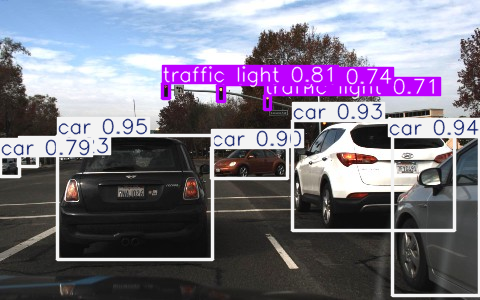

In [40]:
# Plotting results
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))